In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [11]:
movie = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [12]:
movie.head()
#credit.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
str_list = [] # empty list to contain columns with strings
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
#Get to the numeric columns by inversion
num_list = movie.columns.difference(str_list)


In [14]:
movie_num = movie[num_list]
movie_num.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [17]:
#There still exist NaN values, which we have to get rid of

In [15]:
movie_num = movie_num.fillna(value=0, axis=1)

In [18]:
#standardise the data with sklearn's StandardScaler
X = movie_num.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [19]:
list(movie)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

<AxesSubplot:title={'center':'Hexbin of vote_average and revenue'}, xlabel='revenue', ylabel='vote_average'>

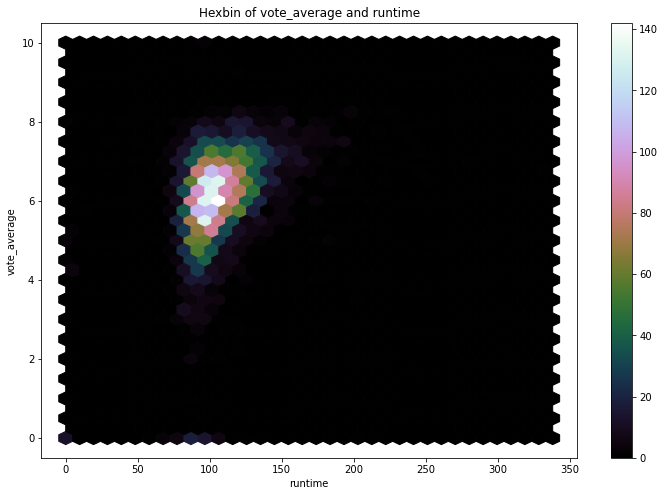

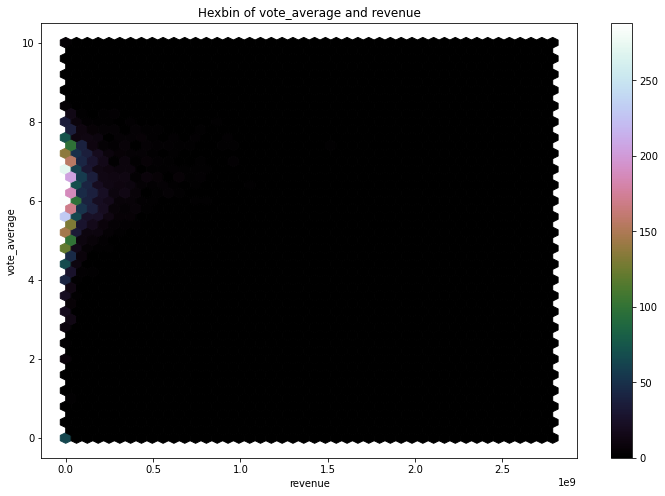

In [20]:
movie.plot(y = 'vote_average', x = 'runtime', kind = 'hexbin', gridsize=35, sharex=False, 
           colormap='cubehelix', title='Hexbin of vote_average and runtime',figsize=(12,8))
movie.plot(y ='vote_average', x = 'revenue', kind='hexbin', gridsize = 45, sharex = False,
          colormap = 'cubehelix', title='Hexbin of vote_average and revenue', figsize = (12,8))

<AxesSubplot:title={'center':'Pearson Correlation of Movie Features'}>

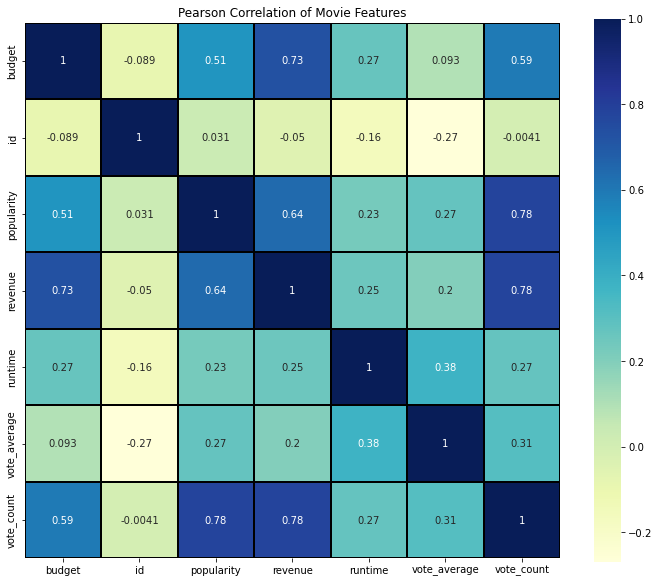

In [21]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [22]:
# The darker reagions have quite a positive correlation amongst eachother. This is a good sign that 
# we may be able to find features on which we can perform PCA projections on. 
# (Principal Component Analysis)

In [23]:
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [24]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [25]:
cum_var_exp

array([ 46.79589959,  66.04199613,  78.00935894,  88.14763754,
        94.03694228,  97.71814304, 100.        ])

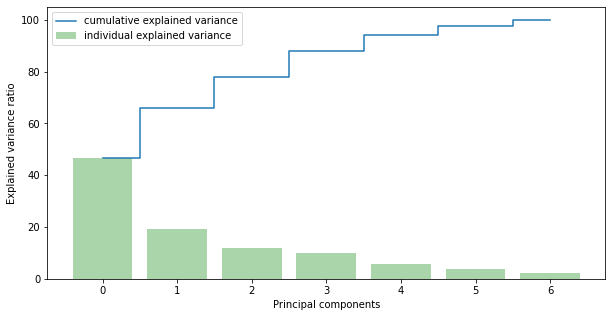

In [26]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [27]:


movie_num.describe()



,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.831355,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.712156,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


<AxesSubplot:ylabel='Frequency'>

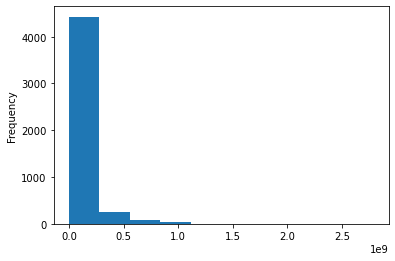

In [33]:
movie['revenue'].plot.hist()

In [36]:
movie['revenue_classes'] = pd.cut(movie['revenue'],10)
movie['vote_classes'] = pd.cut(movie['vote_average'],4, labels=["low", "medium-low","medium-high","high"])
#movie['vote_classes'] = pd.cut(movie['vote_average'],10, labels=["1", "2","3","4","5","6","7","8","9","10"])

In [37]:
list(movie)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'revenue_classes',
 'vote_classes']

In [39]:
X_revenue = movie.ix[:,(0,8,18,19)].values
y_revenue = movie.ix[:,20].values

X_votes = movie.ix[:,(0,8,12,19)].values
y_votes = movie.ix[:,21].values

AttributeError: 'DataFrame' object has no attribute 'ix'

In [40]:
from matplotlib import pyplot as plt
import numpy as np
import math

feature_dict ={0:'budget',
              1: 'popularity',
              2: 'revenue',
              3: 'vote_count'}

#Use this block for a cut in 4 blocks
'''
label_dict = {1: 'low',
              2: 'medium-low',
              3: 'medium-high',
              4: 'high'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        for lab in('low', 'medium-low','medium-high','high'):
            plt.hist(X_votes[y_votes==lab, cnt],
                    label = lab,
                    bins = 10,
                    alpha = 0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        
        plt.tight_layout()
        plt.show()
'''

#Use this block for a cut in 10 blocks.
label_dict = {0: '0-1',
               1: '1-2',
               2: '2-3',
               3: '3-4',
               4: '4-5',
               5: '5-6',
               6: '6-7',
               7: '7-8',
               8: '8-9',
               9: '9-10'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        for lab in("1", "2","3","4","5","6","7","8","9","10"):
            plt.hist(X_votes[y_votes==lab, cnt],
                    label = lab,
                    bins = 10,
                    alpha = 0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        
        plt.tight_layout()
        plt.show()

NameError: name 'X_votes' is not defined

<Figure size 576x432 with 0 Axes>